In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.linear_model import LinearRegression

In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
population_data = pd.read_csv('/Users/maheshg/Dropbox/Sample Datasets Kaggle/city_population.csv')

In [19]:
population_data.shape

(64, 10)

In [20]:
population_data.columns

Index(['Name', 'Abbr.', 'Division', 'Established', 'Native', 'Area (km2)',
       'Population_1991', 'Population_2001', 'Population_2011',
       'Population_2022'],
      dtype='object')

In [21]:
population_data.head(n=10)

,Name,Abbr.,Division,Established,Native,Area (km2),Population_1991,Population_2001,Population_2011,Population_2022
0,Barguna,BRG,Barisal,1984,বরগুনা জেলা,1831,805000,887376,927889,1035596
1,Barishal,BRS,Barisal,1797,বরিশাল জেলা,2785,2299000,2465249,2414729,2634203
2,Bhola,BHO,Barisal,1984,ভোলা জেলা,3403,1532000,1781043,1846351,1980452
3,Jhalokati,JHA,Barisal,1984,ঝালকাঠি জেলা,707,694000,726182,709914,677559
4,Patuakhali,PAT,Barisal,1969,পটুয়াখালী জেলা,3221,1323000,1527628,1596223,1770096
5,Pirojpur,PIR,Barisal,1984,পিরোজপুর জেলা,1278,1104000,1161548,1157215,1227915
6,Bandarban,BAN,Chattogram,1981,বান্দরবান জেলা,4496,246000,311741,404091,495252
7,Brahmanbaria,BBA,Chattogram,1984,ব্রাহ্মণবাড়ীয়া জেলা,1881,2268000,2509383,2953208,3403786
8,Chandpur,CHA,Chattogram,1984,চাঁদপুর জেলা,1645,2150000,2377088,2513838,2713247
9,Chattogram,CHI,Chattogram,1666,চট্টগ্রাম জেলা,5282,5744000,7009504,7913366,9439076


In [22]:
population_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             64 non-null     object
 1   Abbr.            64 non-null     object
 2   Division         64 non-null     object
 3   Established      64 non-null     int64 
 4   Native           64 non-null     object
 5   Area (km2)       64 non-null     int64 
 6   Population_1991  64 non-null     int64 
 7   Population_2001  64 non-null     int64 
 8   Population_2011  64 non-null     int64 
 9   Population_2022  64 non-null     int64 
dtypes: int64(6), object(4)
memory usage: 5.1+ KB


In [23]:
population_data.isna().sum()

Name               0
Abbr.              0
Division           0
Established        0
Native             0
Area (km2)         0
Population_1991    0
Population_2001    0
Population_2011    0
Population_2022    0
dtype: int64

In [24]:
population_data.isnull().sum()

Name               0
Abbr.              0
Division           0
Established        0
Native             0
Area (km2)         0
Population_1991    0
Population_2001    0
Population_2011    0
Population_2022    0
dtype: int64

In [25]:
population_data.describe()

,Established,Area (km2),Population_1991,Population_2001,Population_2011,Population_2022
count,64.000000,64.000000,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01
mean,1937.703125,2306.000000,1.741500e+06,2.039416e+06,2.340193e+06,2.653577e+06
std,84.372884,1184.492899,1.086475e+06,1.415458e+06,1.811774e+06,2.203057e+06
min,1666.000000,684.000000,2.460000e+05,3.117410e+05,4.040910e+05,4.952520e+05
25%,1963.500000,1379.250000,1.102250e+06,1.213935e+06,1.283516e+06,1.430418e+06
50%,1984.000000,2084.000000,1.545500e+06,1.829092e+06,2.008954e+06,2.215752e+06
75%,1984.000000,2960.750000,2.160750e+06,2.474170e+06,2.745524e+06,3.020196e+06
max,1984.000000,6116.000000,6.164000e+06,9.151343e+06,1.251736e+07,1.521085e+07


In [26]:
population_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             64 non-null     object
 1   Abbr.            64 non-null     object
 2   Division         64 non-null     object
 3   Established      64 non-null     int64 
 4   Native           64 non-null     object
 5   Area (km2)       64 non-null     int64 
 6   Population_1991  64 non-null     int64 
 7   Population_2001  64 non-null     int64 
 8   Population_2011  64 non-null     int64 
 9   Population_2022  64 non-null     int64 
dtypes: int64(6), object(4)
memory usage: 5.1+ KB


In [30]:
population_data.describe(include='object')

,Name,Abbr.,Division,Native
count,64,64,64,64
unique,64,64,8,64
top,Barguna,BRG,Dhaka,বরগুনা জেলা
freq,1,1,13,1


Performing Central Tendency (Mean, Median and Mode)

In [32]:
mean_population = population_data['Population_1991'].mean()
print(f"Mean Population in 1991: {mean_population}")

Mean Population in 1991: 1741500.0


In [34]:
mean_population = population_data['Population_2001'].mean()
print(f"Mean Population in 2001: {mean_population}")

Mean Population in 2001: 2039415.59375


In [35]:
mean_population = population_data['Population_2011'].mean()
print(f"Mean Population in 2011: {mean_population}")

Mean Population in 2011: 2340193.0


In [36]:
mean_population = population_data['Population_2022'].mean()
print(f"Mean Population in 2022: {mean_population}")

Mean Population in 2022: 2653576.765625


In [37]:
median_population = population_data['Population_1991'].median()
print(f"Median Population in 1991: {median_population}") 

Median Population in 1991: 1545500.0


In [38]:
median_population = population_data['Population_2001'].median()
print(f"Median Population in 2001: {median_population}")

Median Population in 2001: 1829092.5


In [39]:
median_population = population_data['Population_2011'].median()
print(f"Median Population in 2011: {median_population}")

Median Population in 2011: 2008954.5


In [40]:
median_population = population_data['Population_2022'].median()
print(f"Median Population in 2022: {median_population}")

Median Population in 2022: 2215751.5


In [45]:
mode_population = population_data['Population_1991'].mode()
print(f"Mode Population in 1991: {mode_population[0]}")

Mode Population in 1991: 246000


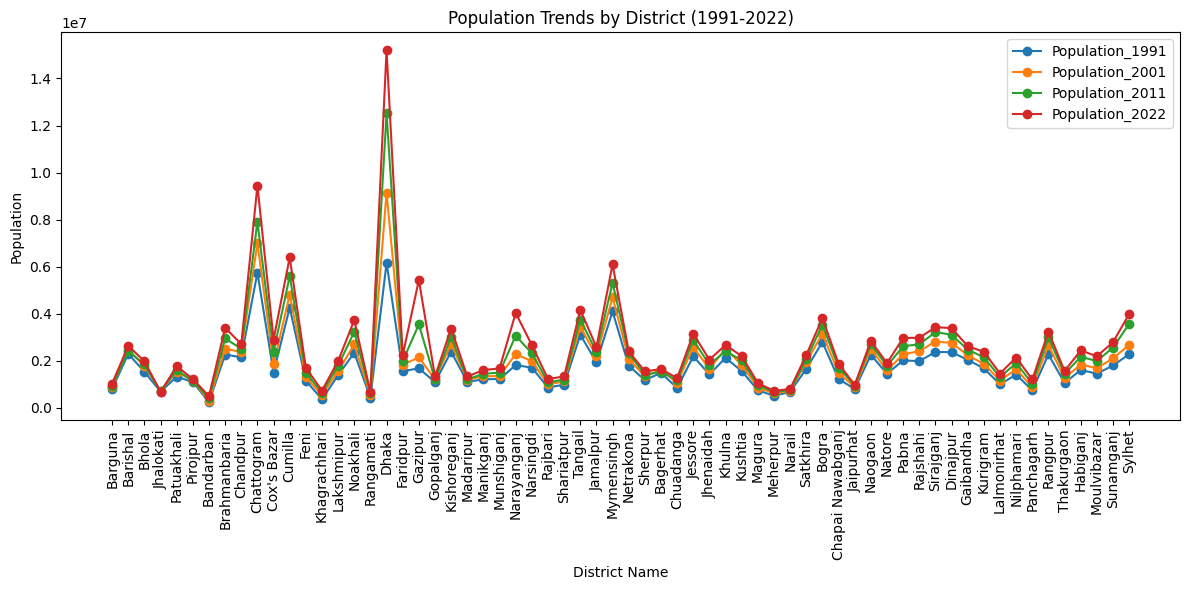

In [50]:
plt.figure(figsize=(12, 6))
for year in years:
    plt.plot(population_data['Name'], population_data[year], marker='o', label=year)
plt.xticks(rotation=90)
plt.xlabel('District Name')
plt.ylabel('Population')
plt.title('Population Trends by District (1991-2022)')
plt.legend()
plt.tight_layout()
plt.show()

In [46]:
mode_population = population_data['Population_2001'].mode()[0]
print(f"Mode Population in 2001: {mode_population}")

Mode Population in 2001: 311741


In [47]:
mode_population = population_data['Population_2011'].mode()[0]
print(f"Mode Population in 2011: {mode_population}")

Mode Population in 2011: 404091


In [48]:
mode_population = population_data['Population_2022'].mode()[0]
print(f"Mode Population in 2022: {mode_population}")

Mode Population in 2022: 495252


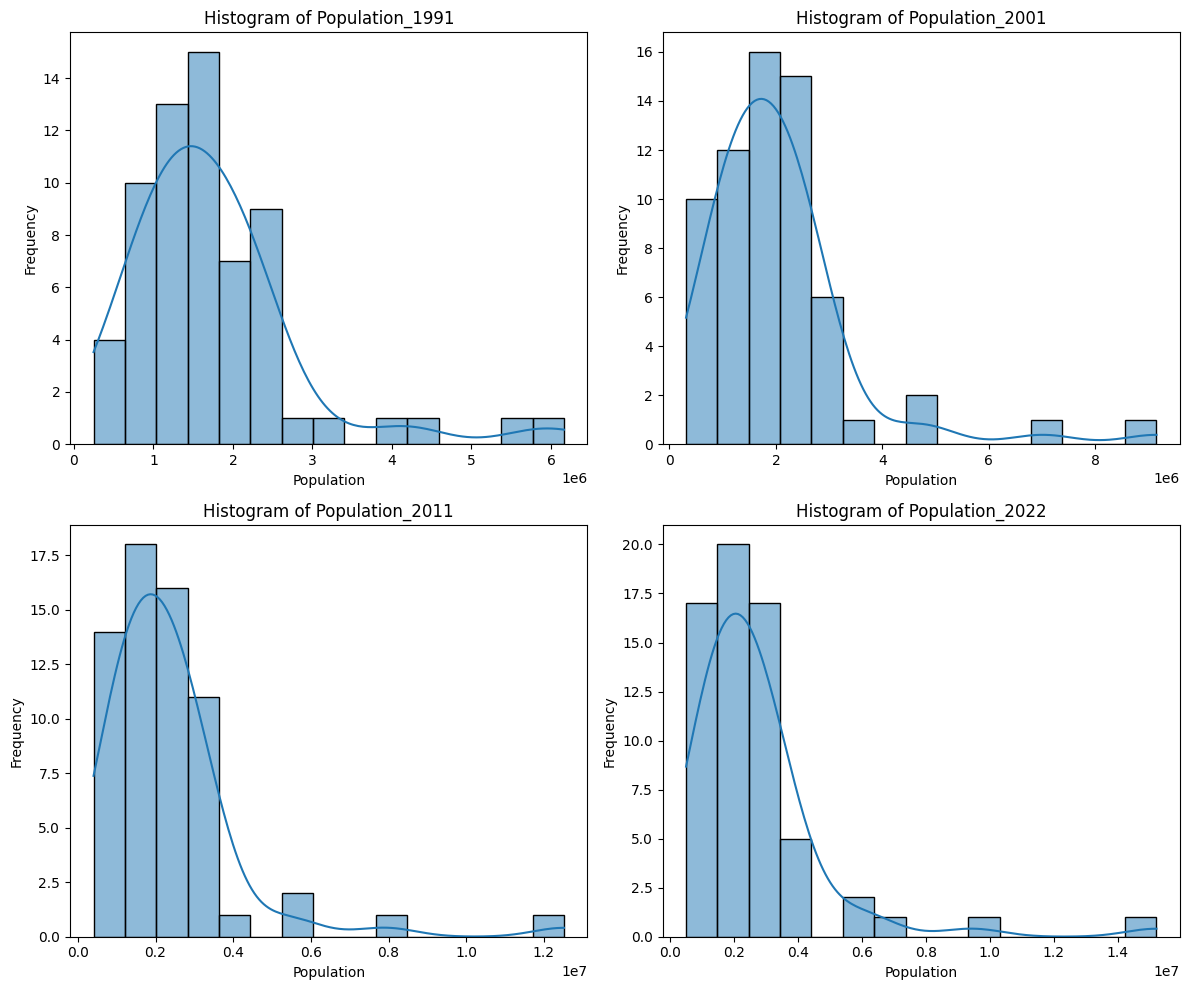

In [49]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
years = ['Population_1991', 'Population_2001', 'Population_2011', 'Population_2022']
for ax, year in zip(axes.flatten(), years):
    sns.histplot(population_data[year], bins=15, kde=True, ax=ax)
    ax.set_title(f'Histogram of {year}')
    ax.set_xlabel('Population')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()